# K Means Clustering Algorithms Implementation

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2,random_state=23)

In [3]:
X.shape

(1000, 2)

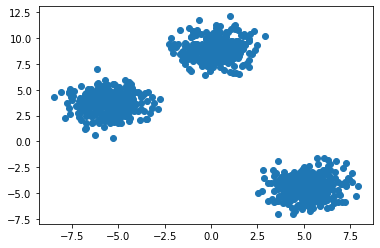

In [6]:
plt.scatter(X[:,0],X[:,1])
# plt.scatter(X[:,0],X[:,1],c=y)

In [7]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [8]:
from sklearn.cluster import KMeans

In [10]:
# manual process
# Elbow method to select the k value

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [11]:
wcss

[34827.57682552022,
 7935.437286145416,
 1319.2730531585607,
 1140.467788465513,
 991.8899785187883,
 853.4943829262842,
 758.6916748395665,
 663.540743589674,
 579.1296648151431,
 532.5875054651609]

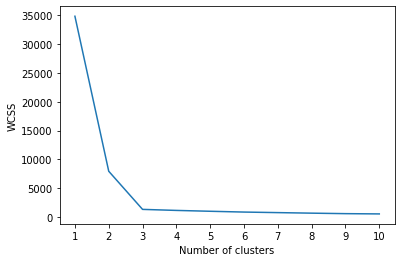

In [12]:
# plot elbow curve

plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [14]:
kmeans = KMeans(n_clusters=3, init="k-means++")

In [16]:
y_labels = kmeans.fit_predict(X_train)

In [20]:
y_test_label = kmeans.predict(X_test)

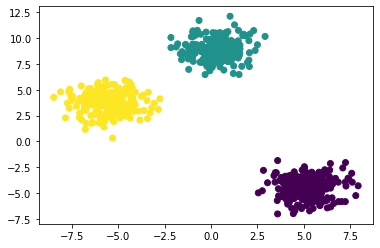

In [21]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

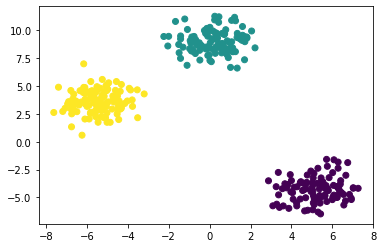

In [22]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_label)

In [24]:
## Knee locator
!pip install kneed

In [26]:
from kneed import KneeLocator

In [28]:
k1 = KneeLocator(range(1,11),wcss,curve='convex',direction = 'decreasing')
k1.elbow

3

In [29]:
## Performance metrics
## silhoutte score

from sklearn.metrics import silhouette_score

In [30]:
silhouette_coefficient = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k, init='k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficient.append(score)

In [32]:
silhouette_coefficient

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.49137731762633263,
 0.33899896897883774,
 0.34583620223108336,
 0.34902540070522714,
 0.34274808515760863,
 0.33527084290794895]

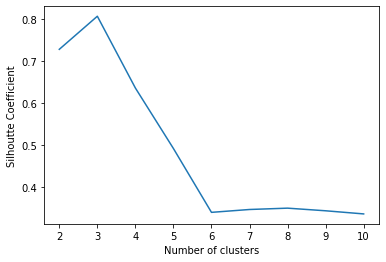

In [33]:
plt.plot(range(2,11),silhouette_coefficient)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhoutte Coefficient")
plt.show() # at no. of cluster 3 is better it has max value